<a href="https://colab.research.google.com/github/bellaabdelouahab/Colab-Notebooks/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP10:**Naives bayes**

Charger des données
Récuperer les données à partir du datasets https://www.kaggle.com/venky73/spam-mails-dataset

-Entraînez le model en utilisant Naives Bayes.

-Partitionner ces données en X_train, X_test, y_train, y_test
Mesurez accurancy de votre modèle.

-Utiliser CountVectorizer from sklearn.feature_extraction.text pour transormer les données.

- Verifier est-ce-que ces emails sont-ils des spam?
**Email1**:  'Hey mohan, can we get together to watch footbal game tomorrow?',

Email2:  'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'


 



In [131]:
#make shure you have kagel.json uploaded to this colab notebook, if you don't know how visit https://www.kaggle.com/general/74235
! pip install -q kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions -h
!kaggle competitions download -c DATASET
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output
clear_output(wait=True)
print("All Good")

All Good


In [132]:
!kaggle datasets download -d venky73/spam-mails-dataset

spam-mails-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [133]:
!mkdir spam-mails
!unzip spam-mails-dataset.zip -d spam-mails
clear_output(wait=True)
print("file unziped seccessfully")

file unziped seccessfully


In [134]:
import pandas as pd
Data = pd.read_csv("/content/spam-mails/spam_ham_dataset.csv")
Data.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


First Methode : Return All emails to text to ascii code

In [145]:
X = Data["text"]
X = [[ ord(letter) for letter in list(text) ] for text in X]
lens = [len(x) for x in X]
import numpy as np
maxindex = len(X[np.argmax(lens)])
for i in range(len(X)):
  newX = np.zeros(maxindex)
  for letter in range(len(X[i])):
    newX[letter]=X[i][letter]
  X[i]=newX
np.argmax(lens)
X = np.array(X)
Y = Data["label_num"]

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [147]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
Model = gnb.fit(X_train, y_train)
predict = Model.predict(X_test)

In [148]:
Model.score(X_test,y_test)

0.7294685990338164

Second Methode : Use Advanced Methode of sklearn to Proccess Text

In [139]:
import re
X = Data["text"]
for text in range(len(X)):
  X[text] = re.sub('[^a-zA-Z0-9\n]', ' ', X[text])
  #replace_multiple_spaces_with_single_space
  X[text] = re.sub('\s+',' ', X[text])
  
  #converting_all_the_chars_into_lower_case
  X[text] = X[text].lower()

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)

In [141]:
#perform_tfidf_vectorization_of_text_data
from sklearn.feature_extraction.text import TfidfVectorizer

text_vec = TfidfVectorizer(min_df=10, max_features=5000)
text_vec.fit(X_train.values)

train_text = text_vec.transform(X_train.values)
test_text = text_vec.transform(X_test.values)
cv_text = text_vec.transform(X_cv.values)

print(train_text.shape)
print(test_text.shape)
print(cv_text.shape)

(3308, 3609)
(1035, 3609)
(828, 3609)


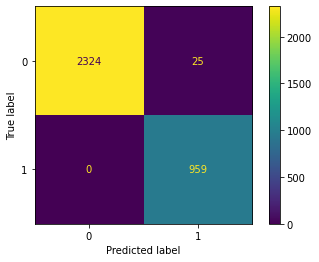

In [142]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix

gnb = GaussianNB()
Model1 = gnb.fit(train_text.toarray(), y_train)

plot_confusion_matrix(Model1,train_text.toarray(), y_train)


In [143]:
Model1.score(cv_text.toarray(),y_cv)

0.9722222222222222

In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_cv, Model1.predict(cv_text.toarray())))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       588
           1       0.96      0.95      0.95       240

    accuracy                           0.97       828
   macro avg       0.97      0.96      0.97       828
weighted avg       0.97      0.97      0.97       828

